In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [3]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [4]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [5]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x000002BCFBFD0168>)
ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x000002BCFBFD0168>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x000002BCFBFD0168>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function=<function sum_over at 0x000002BCFBFD0168>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function

In [6]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=500, policies=100)
    
#observing the simulation runs
experiments, outcomes = results

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 500 scenarios * 100 policies * 1 model(s) = 50000 experiments
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 15000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 25000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 35000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 45000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


NameError: name 'save_results' is not defined

In [7]:
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results

In [8]:
save_results((experiments, outcomes), './results_analysis2.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Quint\Documents\GitHub\MBDM\final assignment\results_analysis2.tar.gz


In [8]:
experiments,outcomes=load_results('./results_analysis1.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Quint\Documents\GitHub\MBDM\final assignment\results_analysis1.tar.gz


In [9]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,12.0,196.049289,10,0.928707,261.436603,10,0.556528,101.881912,1.5,0.219548,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,0,0,dikesnet
1,107.0,88.962604,1.5,0.873807,267.855008,1.5,0.911126,53.258601,1,0.009783,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,1,0,dikesnet
2,44.0,118.839013,1.5,0.200569,208.688641,10,0.222467,66.918365,1,0.209988,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,2,0,dikesnet
3,32.0,332.225929,10,0.369382,348.458264,1,0.487069,140.640012,1.5,0.072263,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,3,0,dikesnet
4,63.0,287.600177,1.5,0.728108,298.352511,1.5,0.254642,60.607872,10,0.543411,...,6.0,9.0,10.0,1.0,3.0,4.0,2.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,63.0,212.613048,1.5,0.448640,204.004672,1.5,0.174004,310.417081,1.5,0.700947,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,495,99,dikesnet
49996,68.0,319.486358,1.5,0.926600,53.324749,10,0.715006,94.511333,10,0.621755,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,496,99,dikesnet
49997,82.0,295.493397,1,0.942111,85.325680,1,0.420585,81.426887,1.5,0.426154,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,497,99,dikesnet
49998,18.0,114.435242,1,0.348111,83.316255,1.5,0.764033,248.393443,10,0.478631,...,9.0,7.0,3.0,7.0,1.0,10.0,4.0,498,99,dikesnet


In [10]:
outcomes

{'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Dike Investment Costs': array([2.62167392e+08, 2.62167392e+08, 2.62167392e+08, ...,
        2.81975148e+08, 2.81975148e+08, 2.81975148e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Expected Annual Damage': array([     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        , 990537.89984249]),
 'A.2_Dike Investment Costs': array([2.65985127e+08, 2.65985127e+08, 2.65985127e+08, ...,
        2.67968038e+08, 2.67968038e+08, 2.67968038e+08]),
 'A.2_Expected Number of Deaths': array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0001754]),
 'A.3_Expected Annual Damage': array([       0.        , 32911824.61266958,        0.        , ...,
               0.        ,        0.        ,        0.        ]),
 'A.3_Dike Investment Costs': array([9.51027694e+07, 9.51027694e+07, 9.51027694e+07, ...,
        1.62311523e+08, 1.623

In [11]:
#create a dataframe from the outcomes with an extra column with policy names
policies = experiments['policy']
data = pd.DataFrame(outcomes)
data['policy'] = policies

In [12]:
#add columns to the dataframe in which total outcomes are defined for damage, investment costs and number of deaths
data['total expected Annual Damage']=data['A.1_Expected Annual Damage']+data['A.2_Expected Annual Damage']+data['A.3_Expected Annual Damage']+data['A.4_Expected Annual Damage']+data['A.5_Expected Annual Damage']
data['total dike investment costs']=data['A.1_Dike Investment Costs']+data['A.2_Dike Investment Costs']+data['A.3_Dike Investment Costs']+data['A.4_Dike Investment Costs']+data['A.5_Dike Investment Costs']
data['total Expected Number of Deaths']=data['A.1_Expected Number of Deaths']+data['A.2_Expected Number of Deaths']+data['A.3_Expected Number of Deaths']+data['A.4_Expected Number of Deaths']+data['A.5_Expected Number of Deaths']

In [13]:
#create an outcomes dataframe with only the relevant outcomes for A3
A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]
A_totaldata=data[['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

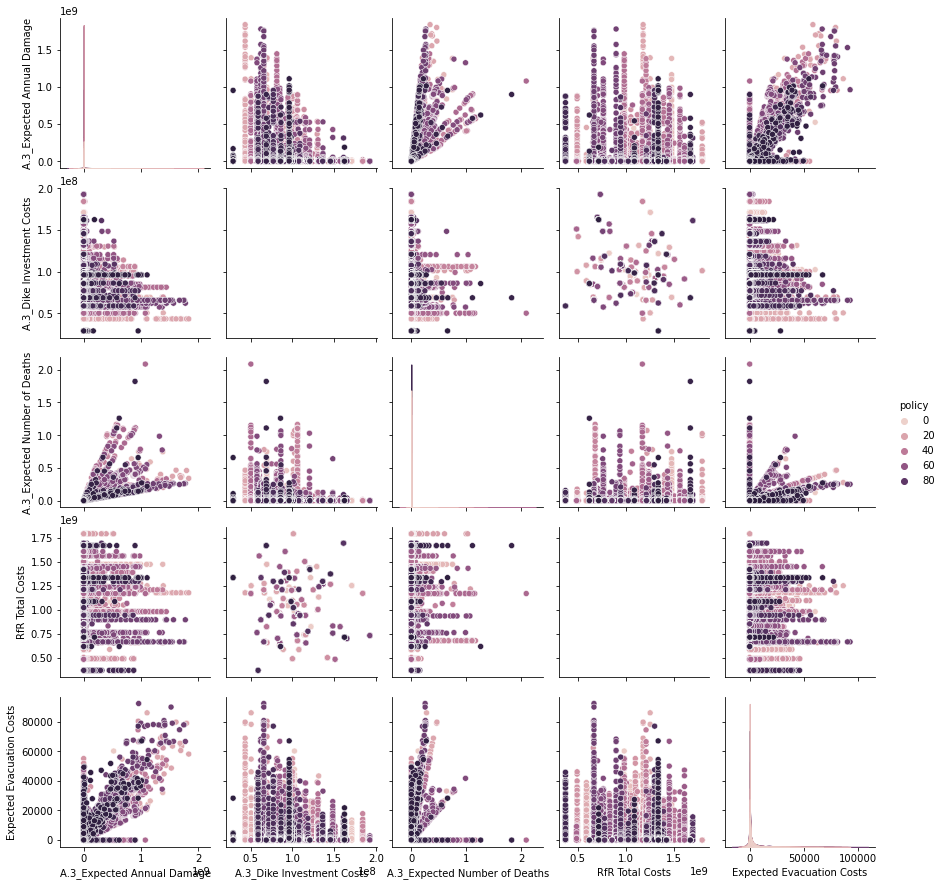

In [14]:
#a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A3pairplot=sns.pairplot(A_3data, hue='policy', vars=['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])
A3pairplot.savefig("A3pairplot.png")

A couple of things seems to be the case:
1. The more is invested in dikes, the less expected number of deaths, the less expected annual damage and the less expected evactuation costs.
2. Expected annual damage and expected number of deaths seem possitively correlated in all cases. 
3. Expected annual damage and expected evactuation costs seem positively correlated in a relatively large fraction of the cases.
4. Expected number of deaths and expected evactuation costs seem positively correlated in a relatively large fraction of the cases.
5. Spending more on RFR measures does not unambiguously lead to less expected number of deaths, less expected annual damage or less expected evactuation costs.

C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Quint\Anaconda3\envs\gds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Datas

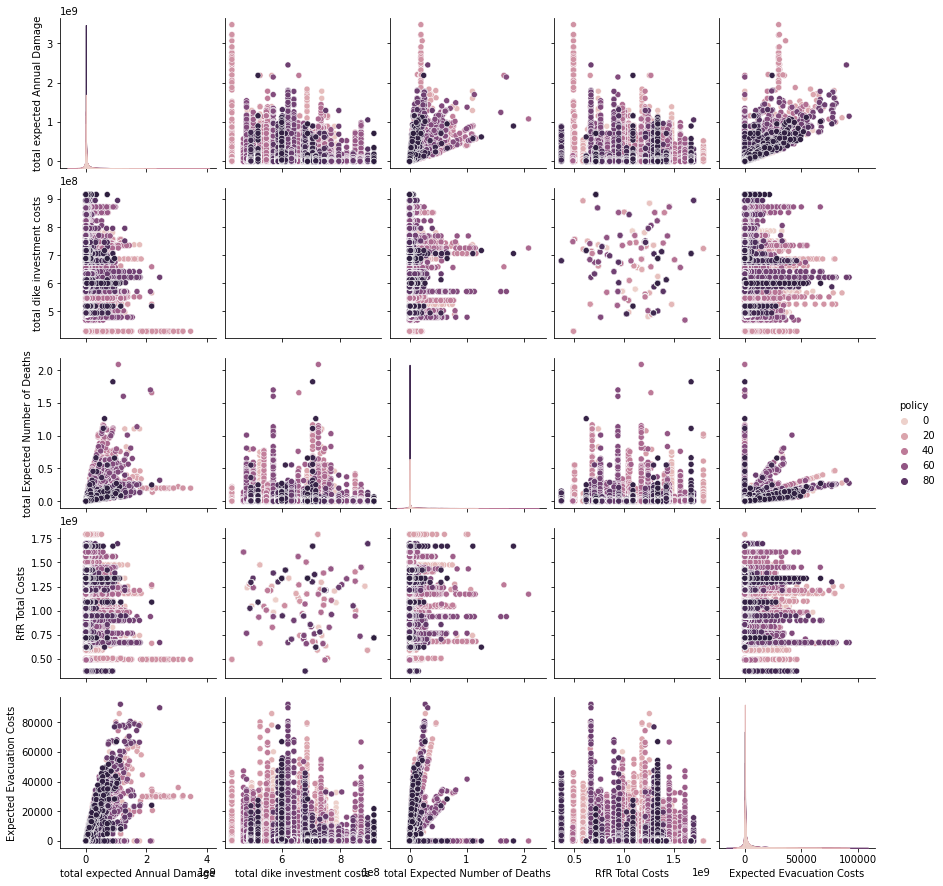

In [15]:
#we also create a pairplot for the 'total data' frame to see if there are trade-offs and/or correlations visible for the whole system
sns.pairplot(A_totaldata, hue='policy', vars=['total expected Annual Damage','total dike investment costs','total Expected Number of Deaths','RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

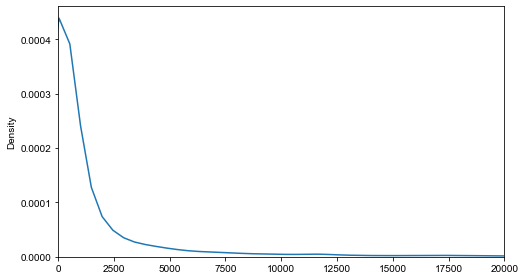

In [16]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['Expected Evacuation Costs'], ax = ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 20000])
fig.subplots_adjust(bottom=0.3)
plt.show()

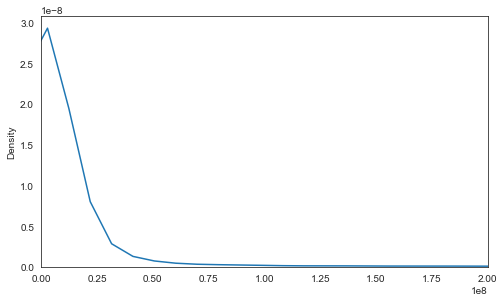

In [17]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['A.3_Expected Annual Damage'], ax = ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 2E08])
fig.subplots_adjust(bottom=0.3)
plt.show()

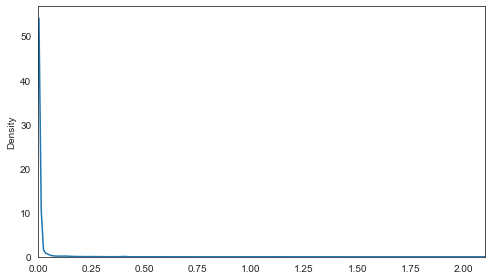

In [18]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['A.3_Expected Number of Deaths'], ax = ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 2.1])
fig.subplots_adjust(bottom=0.3)
plt.show()

In [19]:
ydeaths = outcomes['A.3_Expected Number of Deaths'] < 0.000001
np.sum(ydeaths)

38181

In [20]:
ydamage=outcomes['A.3_Expected Annual Damage'] < 0.1e08
np.sum(ydamage)

43052

In [21]:
yevac=outcomes['Expected Evacuation Costs'] < 1000
np.sum(yevac)

36825

In [22]:
ycombined=(outcomes['A.3_Expected Number of Deaths'] < 0.000001) & (outcomes['A.3_Expected Annual Damage'] < 0.1e08) & (outcomes['Expected Evacuation Costs'] < 1000)
np.sum(ycombined)

30282

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 38181 cases of interest
[MainProcess/INFO] mean: 0.9864, mass: 0.05, coverage: 0.06458709829496347, density: 0.9864 restricted_dimensions: 14


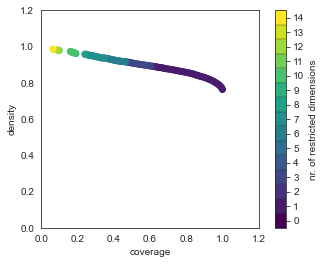

In [23]:
from ema_workbench.analysis import prim
x1 = experiments.drop(columns=['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2','policy'])

prim_alg = prim.Prim(x1, ydeaths, threshold=0.5, peel_alpha=0.01)
boxbestdeaths = prim_alg.find_box()

boxbestdeaths.show_tradeoff()
plt.show()

In [24]:
boxbestdeaths.peeling_trajectory[0:40]

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.763620,0,1.000,0.763620,0
1,0.997748,0.769596,1,0.990,0.769596,1
2,0.994395,0.774837,2,0.980,0.774837,1
3,0.990309,0.779608,3,0.970,0.779608,1
4,0.985935,0.784250,4,0.960,0.784250,1
5,0.981038,0.788568,5,0.950,0.788568,1
6,0.975773,0.792681,6,0.940,0.792681,1
7,0.970221,0.796645,7,0.930,0.796645,1
8,0.964144,0.800261,8,0.920,0.800261,1
9,0.958016,0.803912,9,0.910,0.803912,1


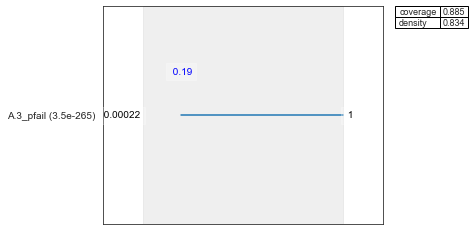

In [25]:
boxbestdeaths.inspect(19,style='graph')
plt.show()

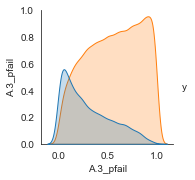

In [26]:
boxbestdeaths.show_pairs_scatter(20)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 43052 cases of interest
[MainProcess/INFO] mean: 0.9983870967741936, mass: 0.062, coverage: 0.07188980767444021, density: 0.9983870967741936 restricted_dimensions: 10


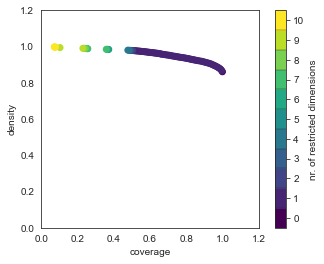

In [27]:
prim_alg = prim.Prim(x1, ydamage, threshold=0.5, peel_alpha=0.01)
boxbestdamage = prim_alg.find_box()

boxbestdamage.show_tradeoff()
plt.show()

In [28]:
boxbestdamage.peeling_trajectory[0:40]

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.861040,0,1.000,0.861040,0
1,0.996702,0.866869,1,0.990,0.866869,1
2,0.992683,0.872184,2,0.980,0.872184,1
3,0.987991,0.877010,3,0.970,0.877010,1
4,0.982254,0.881000,4,0.960,0.881000,1
5,0.976354,0.884926,5,0.950,0.884926,1
6,0.970036,0.888553,6,0.940,0.888553,1
7,0.963486,0.892043,7,0.930,0.892043,1
8,0.956494,0.895196,8,0.920,0.895196,1
9,0.949503,0.898418,9,0.910,0.898418,1


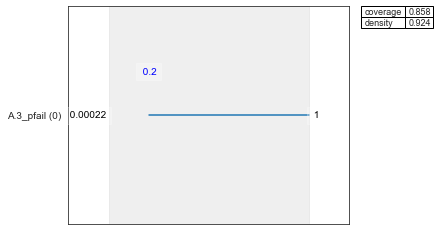

In [29]:
boxbestdamage.inspect(20,style='graph')
plt.show()

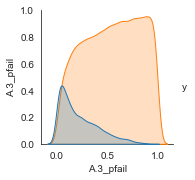

In [30]:
boxbestdamage.show_pairs_scatter(20)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 36825 cases of interest
[MainProcess/INFO] mean: 0.9507142857142857, mass: 0.056, coverage: 0.07228784792939578, density: 0.9507142857142857 restricted_dimensions: 14


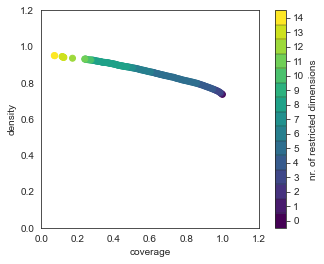

In [31]:
prim_alg = prim.Prim(x1, yevac, threshold=0.5, peel_alpha=0.01)
boxbestevac= prim_alg.find_box()

boxbestevac.show_tradeoff()
plt.show()

In [32]:
boxbestevac.peeling_trajectory[0:40]

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.736500,0,1.000,0.736500,0
1,0.995112,0.740303,1,0.990,0.740303,1
2,0.990143,0.744122,2,0.980,0.744122,2
3,0.985119,0.747979,3,0.970,0.747979,3
4,0.979688,0.751604,4,0.960,0.751604,3
5,0.973578,0.754779,5,0.950,0.754779,3
6,0.967006,0.757660,6,0.940,0.757660,3
7,0.960353,0.760538,7,0.930,0.760538,3
8,0.953673,0.763457,8,0.920,0.763457,3
9,0.946775,0.766264,9,0.910,0.766264,4


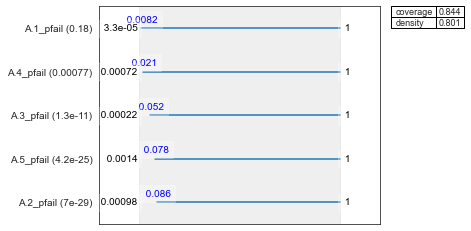

In [39]:
boxbestevac.inspect(23,style='graph')
plt.show()

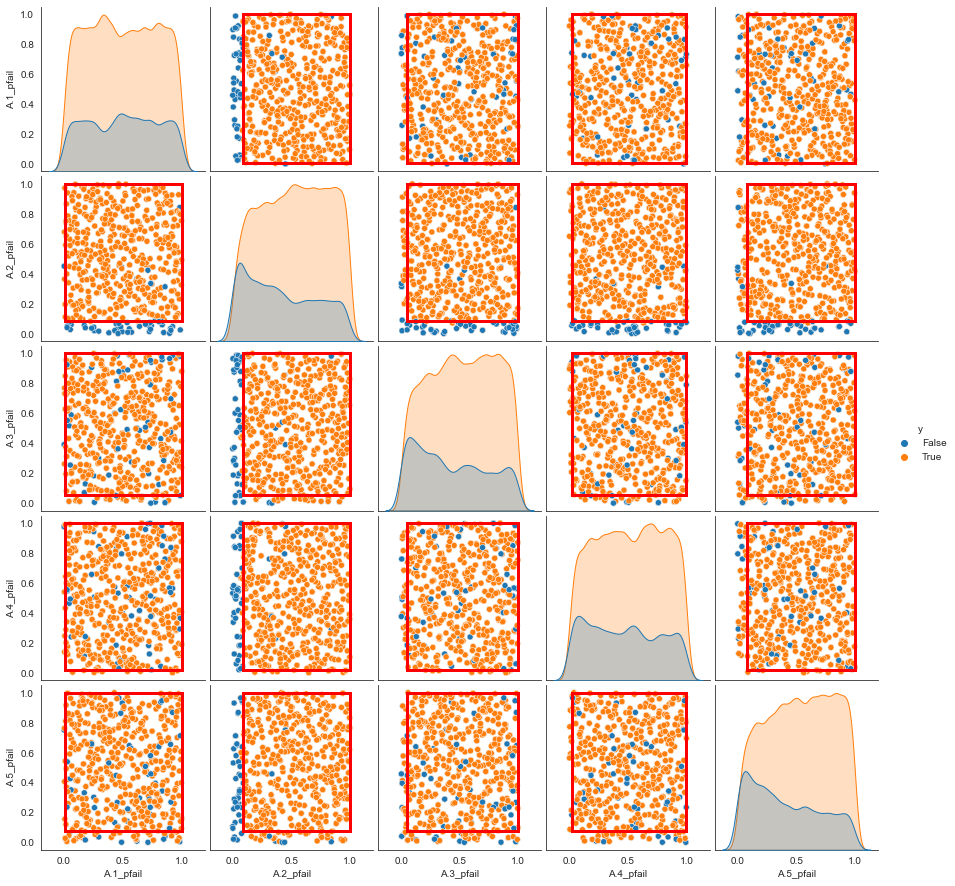

In [40]:
boxbestevac.show_pairs_scatter(23)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 30282 cases of interest
[MainProcess/INFO] mean: 0.8693103448275862, mass: 0.058, coverage: 0.08325077603857077, density: 0.8693103448275862 restricted_dimensions: 12


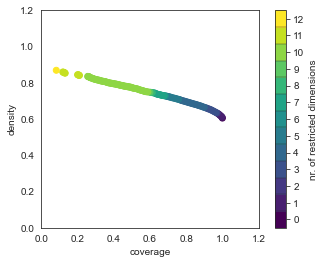

In [35]:
from ema_workbench.analysis import prim
x1 = experiments.drop(columns=['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2','policy'])

prim_alg = prim.Prim(x1, ycombined, threshold=0.5, peel_alpha=0.01)
boxbestcomb = prim_alg.find_box()

boxbestcomb.show_tradeoff()
plt.show()

In [36]:
boxbestcomb.peeling_trajectory[0:40]

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.605640,0,1.000,0.605640,0
1,0.998118,0.610606,1,0.990,0.610606,1
2,0.994518,0.614612,2,0.980,0.614612,1
3,0.990291,0.618309,3,0.970,0.618309,1
4,0.985800,0.621917,4,0.960,0.621917,1
5,0.981573,0.625768,5,0.950,0.625768,1
6,0.977016,0.629489,6,0.940,0.629489,1
7,0.971435,0.632624,7,0.930,0.632624,2
8,0.965755,0.635761,8,0.920,0.635761,3
9,0.960042,0.638945,9,0.910,0.638945,3


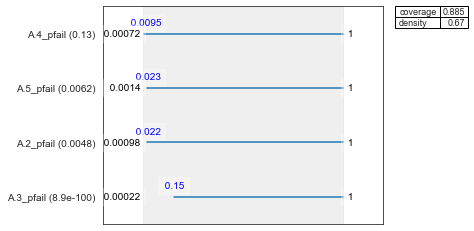

In [37]:
boxbestcomb.inspect(20,style='graph')
plt.show()

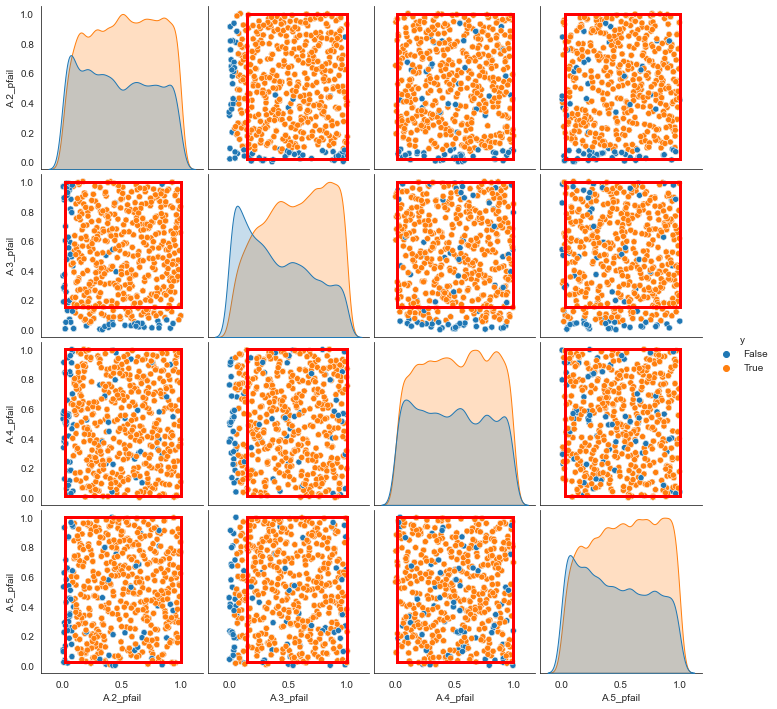

In [38]:
boxbestcomb.show_pairs_scatter(20)
plt.show()